In [ ]:
"""
Inference on loaded models
Author: Booy Faassen
"""

import tensorflow as tf
import matplotlib.pyplot as plt
#from datetime import datetime
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import MobileNetV2
import psutil
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Define some parameters for the loader:
batch_size = 32
img_height = 224
img_width = 224
root_dir = './data/old_data'
class_names=["0.0", "1.0"]

In [ ]:
""" Loading the data: DONE """

def split_train_test_set(dataset):
    train_dir=root_dir +"/" + dataset +"/" + "train"
    test_dir=root_dir + "/" + dataset +"/" + "test"
    # Import data from directories and turn it into batches
    train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     labels='inferred',
                                                                     seed=123,
                                                                     label_mode="categorical",
                                                                     color_mode='rgb',
                                                                     batch_size=batch_size, # number of images to process at a time 
                                                                     image_size=(img_height, img_width)
                                                                    )

    test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                    labels='inferred',
                                                                    seed=123,
                                                                    label_mode="categorical",
                                                                    color_mode='rgb',
                                                                    batch_size=batch_size, # number of images to process at a time 
                                                                    image_size=(img_height, img_width)   
                                                                   )
    return train_data, test_data

In [19]:
""" Load all InceptionV3 models """

dir = '../../Results/inception/inception/'
nr_models = 8
nr_tests = 1
loaded_models = {}

for test in range(nr_tests):
    for i in range(nr_models):
        filename = 'inception_test' + str(test+1) + '_dataset0' + str(i+1)
        model = tf.keras.models.load_model(dir+filename)
        loaded_models.update({filename: model})
        print(filename, '--- Done')

inception_test3_dataset01 --- Done
inception_test3_dataset02 --- Done
inception_test3_dataset03 --- Done
inception_test3_dataset04 --- Done
inception_test3_dataset05 --- Done
inception_test3_dataset06 --- Done
inception_test3_dataset07 --- Done
inception_test3_dataset08 --- Done


In [2]:
""" Load all MobileNetV2 models """

dir = '../../Results/mobilenet/mobilenet/'
nr_models = 8
nr_tests = 1
loaded_models = {}

for test in range(nr_tests):
    for i in range(nr_models):
        filename = 'mobilenet_test' + str(test+1) + '_dataset0' + str(i+1)
        model = tf.keras.models.load_model(dir+filename)
        loaded_models.update({filename: model})
        print(filename, '--- Done')

mobilenet_test1_dataset01 --- Done
mobilenet_test1_dataset02 --- Done
mobilenet_test1_dataset03 --- Done
mobilenet_test1_dataset04 --- Done
mobilenet_test1_dataset05 --- Done
mobilenet_test1_dataset06 --- Done
mobilenet_test1_dataset07 --- Done
mobilenet_test1_dataset08 --- Done


In [31]:
""" Load all EfficientNet-B0 models """

dir = '../../Results/efficient/efficient/'
nr_models = 8
nr_tests = 1
loaded_models = {}

for test in range(nr_tests):
    for i in range(nr_models):
        filename = 'efficient_test' + str(test+3) + '_dataset0' + str(i+1)
        model = tf.keras.models.load_model(dir+filename)
        loaded_models.update({filename: model})
        print(filename, '--- Done')

efficient_test3_dataset01 --- Done
efficient_test3_dataset02 --- Done
efficient_test3_dataset03 --- Done
efficient_test3_dataset04 --- Done
efficient_test3_dataset05 --- Done
efficient_test3_dataset06 --- Done
efficient_test3_dataset07 --- Done
efficient_test3_dataset08 --- Done


In [59]:
""" Evaluate all models """

bs = 32

count = 0
for i in loaded_models:
    if "mobilenet_test3" in i: # change this row for different models
        count += 1
        ds = 'dataset0' + str(count)
        train_ds, test_ds = split_train_test_set(ds)
        print(i, 'running now...')
        results = loaded_models[i].evaluate(
            x = test_ds,
            batch_size = bs,
            verbose = 1
        )
        print('\n')

Found 1969 files belonging to 2 classes.
Found 655 files belonging to 2 classes.
mobilenet_test3_dataset01 running now...
21/21 [==============================] - 34s 1s/step - loss: 4.4640 - accuracy: 0.3130


Found 806 files belonging to 2 classes.
Found 268 files belonging to 2 classes.
mobilenet_test3_dataset02 running now...
9/9 [==============================] - 15s 1s/step - loss: 0.9639 - accuracy: 0.5000


Found 1162 files belonging to 2 classes.
Found 388 files belonging to 2 classes.
mobilenet_test3_dataset03 running now...
13/13 [==============================] - 22s 2s/step - loss: 1.3906 - accuracy: 0.3093


Found 901 files belonging to 2 classes.
Found 173 files belonging to 2 classes.
mobilenet_test3_dataset04 running now...
6/6 [==============================] - 11s 2s/step - loss: 2.0283 - accuracy: 0.3237


Found 1322 files belonging to 2 classes.
Found 228 files belonging to 2 classes.
mobilenet_test3_dataset05 running now...
8/8 [==============================] - 1

In [4]:
"""
Evaluate the model with the test set.
Returns a list of all actual labels and predicted labels, respectively.
"""

def evaluate_model(model, test_data):
    
    img_batch, label_batch = iter(test_data).next()
    
    label_list = []
    prediction_list = []
    
    for i in range(len(label_batch)):
        label_list.append(int(label_batch.numpy()[i][1]))

    # Run predictions on every image in test_data.
    preds = model.predict(img_batch.numpy(), verbose=0)
    for i in range(len(preds)):
        prediction_list.append(round(preds[i][1]))

    return label_list, prediction_list

In [5]:
"""
Plots the confusion matrixs for a given list of actual labels and corresponding predictions.
Partially copied from: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#evaluate_metrics
"""

def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions) # predictions > p) # I took this out
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p)) # I am not sure if it actually evaluates at 0.5...?
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives:', cm[0][0])
    print('False Positives:', cm[0][1])
    print('False Negatives:', cm[1][0])
    print('True Positives:', cm[1][1])
    print('Accuracy:', ((cm[0][0]+cm[1][1]) / (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))
    print('Recall:', (cm[1][1]/(cm[1][1]+cm[1][0])))
    print('Precision:', (cm[1][1]/(cm[1][1]+cm[0][1]))) 

In [6]:
""" Loading the data"""

def split_train_test_set(dataset, bs):
    train_dir=root_dir +"/" + dataset +"/" + "train"
    test_dir=root_dir + "/" + dataset +"/" + "test"
    # Import data from directories and turn it into batches
    train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     labels='inferred',
                                                                     seed=123,
                                                                     label_mode="categorical",
                                                                     color_mode='rgb',
                                                                     batch_size=bs, # number of images to process at a time 
                                                                     image_size=(img_height, img_width)
                                                                    )

    test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                    labels='inferred',
                                                                    seed=123,
                                                                    label_mode="categorical",
                                                                    color_mode='rgb',
                                                                    batch_size=bs, # number of images to process at a time 
                                                                    image_size=(img_height, img_width)   
                                                                   )
    return train_data, test_data

330
Found 992 files belonging to 2 classes.
Found 330 files belonging to 2 classes.
True Negatives: 220
False Positives: 0
False Negatives: 91
True Positives: 19
Accuracy: 0.7242424242424242
Recall: 0.17272727272727273
Precision: 1.0


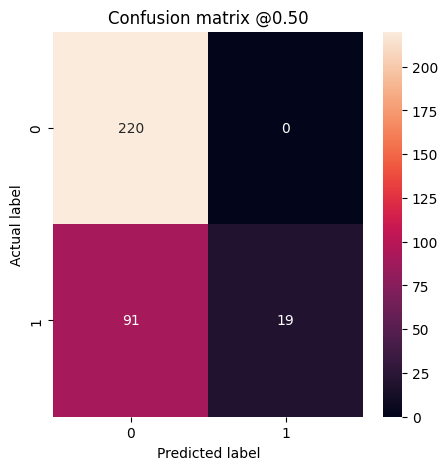

In [39]:
"""To run plot_CM"""

ds = 'dataset08'

new_batch_size = len(os.listdir('./data/old_data/'+ ds +'/test/0.0')) + len(os.listdir('./data/old_data/'+ ds +'/test/1.0'))
print(new_batch_size)

train_ds, test_ds = split_train_test_set(ds, new_batch_size) # make sure bs = lenth of test set
label_list, prediction_list = evaluate_model(loaded_models['efficient_test3_' + ds], test_ds)
plot_cm(label_list, prediction_list)

1/1 - 1s - 948ms/epoch - 948ms/step
1.0: broken. 0.0: whole


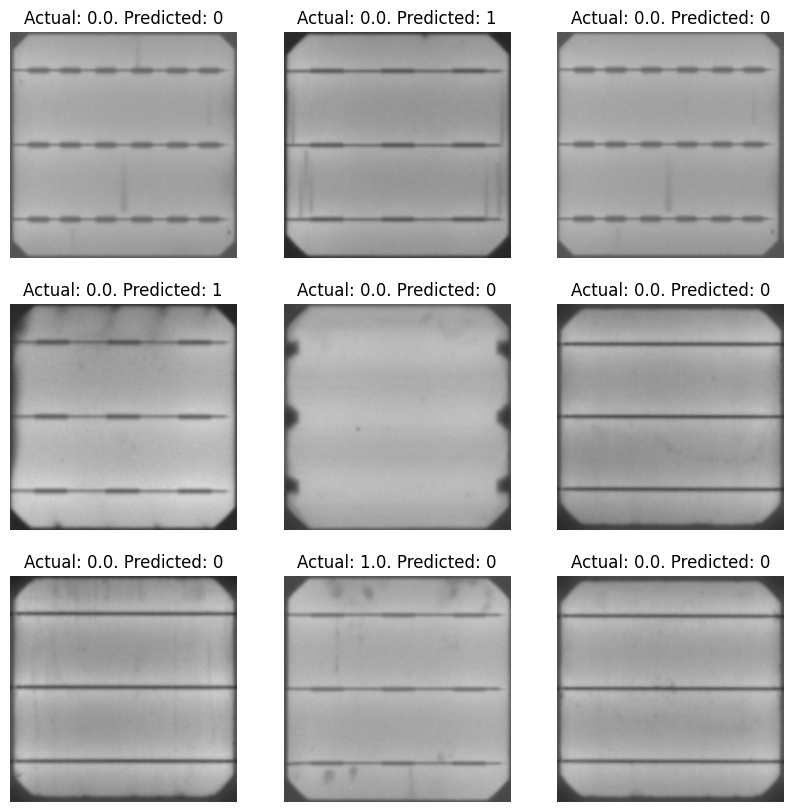

In [47]:
""" Visualize actual label vs prediction """

image_batch, label_batch = next(iter(test_ds))

predictions = loaded_model.predict(image_batch, verbose=2)

print("1.0: broken. 0.0: whole")

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = int(label_batch[i][1].numpy())
    title = "Actual: "  + class_names[label] + ". Predicted: " + str(round(predictions[i][1]))
    plt.title(title)
    plt.axis("off")

#print(predictions)